In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras_core as keras
import tensorflow as tf
from layers.transformer import KNNDownSampling
import pandas as pd
import seaborn as sns
%matplotlib inline

2023-07-20 17:52:08.530513: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 17:52:09.200270: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using TensorFlow backend


In [15]:
features = np.load('data/points.npy')

In [17]:
features

array([[0.5748774, 0.096168 , 0.7169   ],
       [0.874608 , 0.369296 , 0.02587  ],
       [0.212967 , 0.271112 , 0.273438 ],
       ...,
       [0.288286 , 0.854107 , 0.320312 ],
       [0.932644 , 0.368279 , 0.070312 ],
       [0.086512 , 0.687716 , 0.287413 ]], dtype=float32)

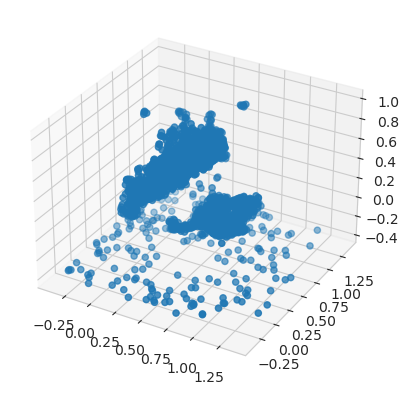

In [16]:
ax = plt.gcf().add_subplot(projection='3d')
ax.scatter(features[:, 0], features[:, 1], features[:, 2])
plt.show()

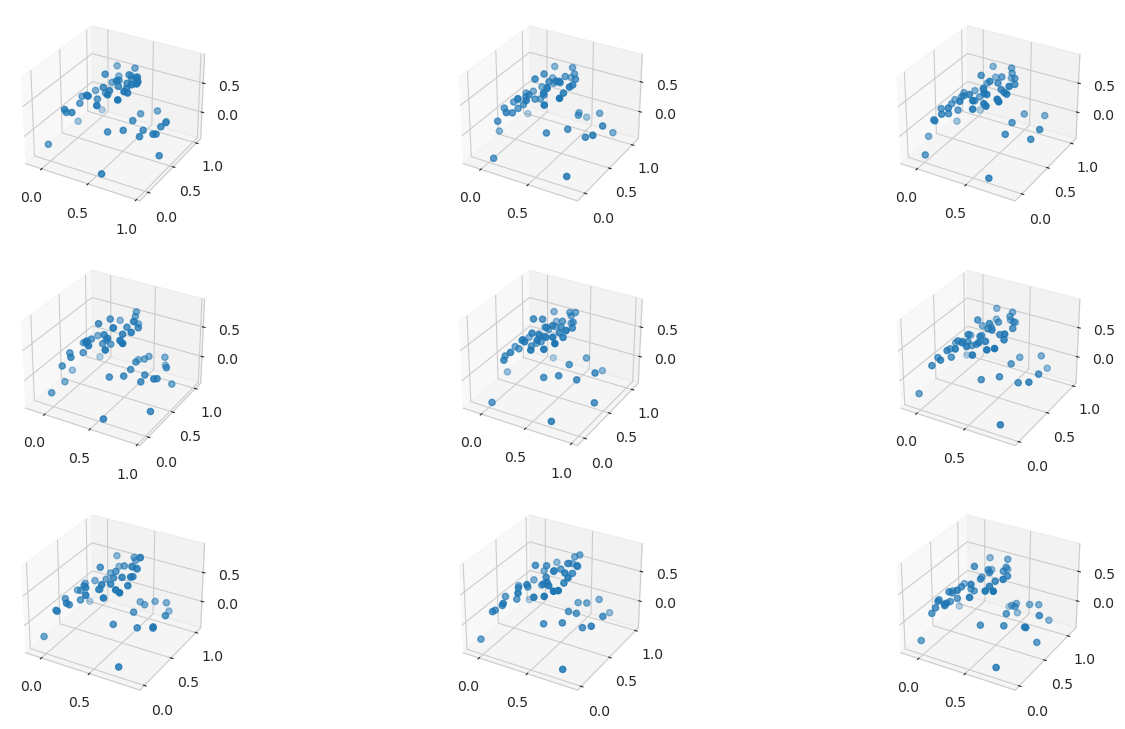

In [48]:
downsampling = KNNDownSampling(int(2970 / 55), 55, sampling_mode='k_means')
out = np.squeeze(downsampling([features[tf.newaxis, ...], features[tf.newaxis, ...]]))
f = plt.figure(figsize=[16, 9])
for i in range(9):
    ax = plt.gcf().add_subplot(3, 3, i + 1, projection='3d')
    out = np.squeeze(downsampling([features[tf.newaxis, ...], features[tf.newaxis, ...]]))
    ax.scatter(out[:, 0], out[:, 1], out[:, 2])
plt.show()

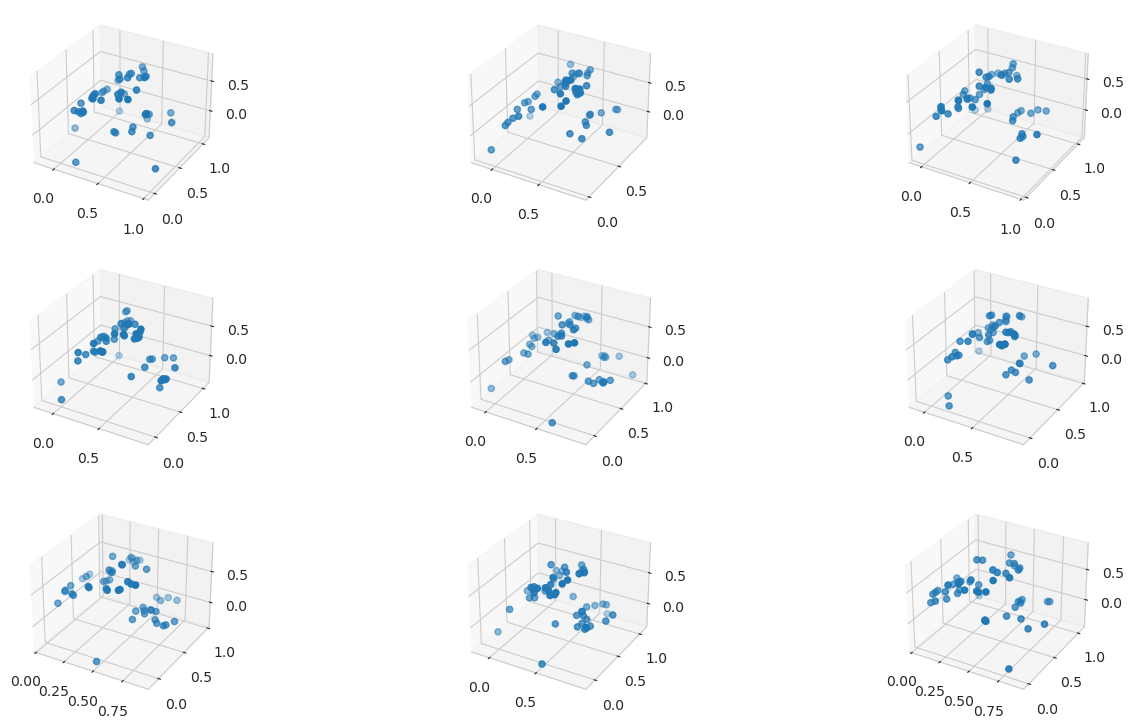

In [49]:
downsampling = KNNDownSampling(int(2970 / 55), 55, sampling_mode='random')
out = np.squeeze(downsampling([features[tf.newaxis, ...], features[tf.newaxis, ...]]))
f = plt.figure(figsize=[16, 9])
for i in range(9):
    ax = plt.gcf().add_subplot(3, 3, i + 1, projection='3d')
    out = np.squeeze(downsampling([features[tf.newaxis, ...], features[tf.newaxis, ...]]))
    ax.scatter(out[:, 0], out[:, 1], out[:, 2])
plt.show()

In [2]:
features = np.random.uniform(size=(1, 16384, 3))
downsampling = KNNDownSampling(int(16384 / 64), 64, sampling_mode='random')
downsampling([features, features])

2023-07-20 17:46:48.316464: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-20 17:46:48.335354: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-20 17:46:48.335413: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-20 17:46:48.337659: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-20 17:46:48.337741: I tensorflow/compile

<tf.Tensor: shape=(1, 256, 3), dtype=float32, numpy=
array([[[0.6489352 , 0.05471833, 0.1520427 ],
        [0.08121292, 0.89492935, 0.29986   ],
        [0.5418789 , 0.8553744 , 0.51698637],
        [0.63075787, 0.20075175, 0.23140937],
        [0.23239268, 0.6794975 , 0.17019252],
        [0.6618903 , 0.6756601 , 0.12176365],
        [0.62403375, 0.93826973, 0.9037863 ],
        [0.7501399 , 0.36925572, 0.64512765],
        [0.3771232 , 0.9366873 , 0.09002414],
        [0.20021662, 0.8138416 , 0.93550813],
        [0.82881606, 0.93727815, 0.7171963 ],
        [0.04741476, 0.15983166, 0.8227864 ],
        [0.08356666, 0.34422788, 0.6619021 ],
        [0.50855565, 0.89189833, 0.48158458],
        [0.4368409 , 0.5830308 , 0.37076098],
        [0.47490776, 0.06674299, 0.23423922],
        [0.07988738, 0.22600316, 0.1045405 ],
        [0.35166058, 0.5737367 , 0.9216219 ],
        [0.4115072 , 0.17912573, 0.14695187],
        [0.17504969, 0.04823703, 0.4655651 ],
        [0.89646816, 0.5368

In [3]:
%%time
for i in range(100):
    downsampling([features, features])

CPU times: user 1.65 s, sys: 145 ms, total: 1.79 s
Wall time: 1.75 s


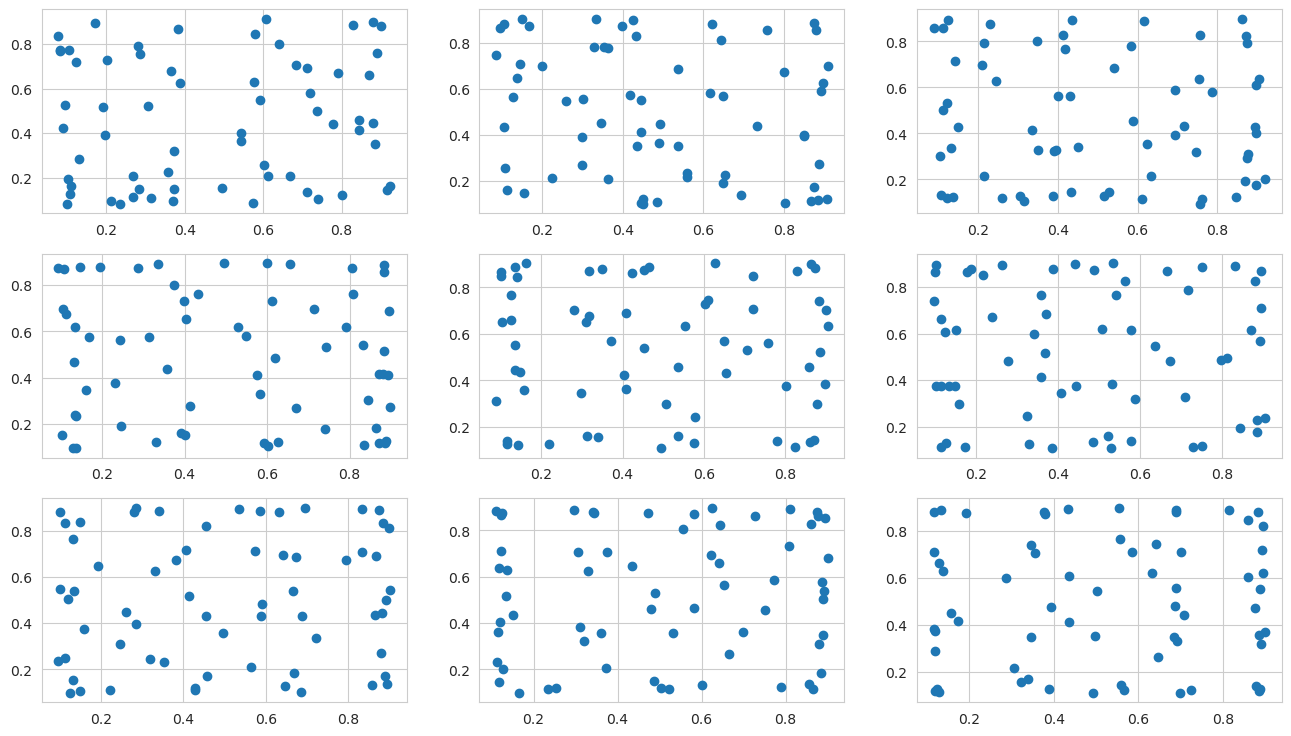

In [10]:
features = np.random.uniform(size=(1, 16384, 3))

f = plt.figure(figsize=[16, 9])
for i in range(9):
    downsampling = KNNDownSampling(int(16384 / 256), 256, kmeans_its=i)
    ax = plt.gcf().add_subplot(3, 3, i + 1)
    out = np.squeeze(downsampling([features, features]))
    ax.scatter(out[:, 0], out[:, 1])
plt.show()

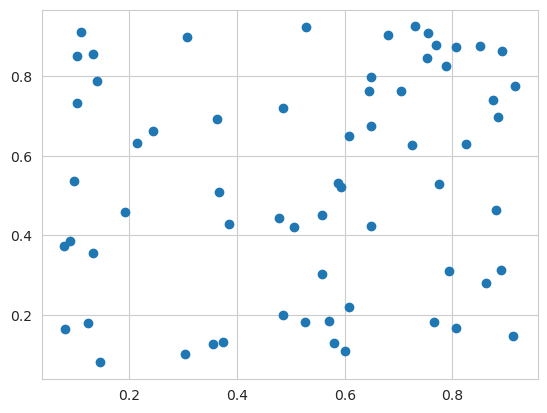

In [11]:
downsampling = KNNDownSampling(int(16384 / 256), 256, kmeans_its=0)
out = np.squeeze(downsampling([features, features]))
plt.scatter(out[:, 0], out[:, 1])

<Axes: >

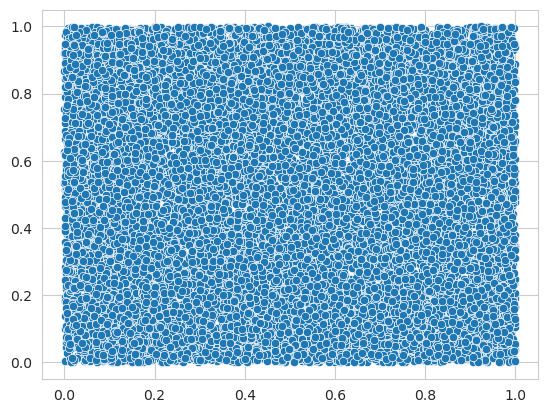

In [17]:
sns.scatterplot(x=features[0, :, 0], y=features[0, :, 1])

<Axes: >

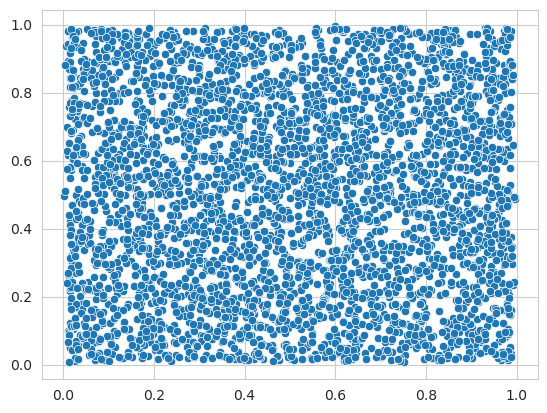

In [36]:
downsampling = KNNDownSampling(int(16384 / 4), 4, kmeans_its=0)
out = np.squeeze(downsampling([features, features]))
sns.scatterplot(x=out[:, 0], y=out[:, 1])

In [32]:
%%time
for i in range(10):
    downsampling([features, features])

CPU times: user 422 ms, sys: 20.7 ms, total: 443 ms
Wall time: 446 ms
